The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



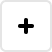
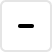
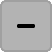
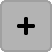
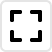
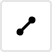
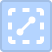
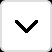
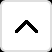
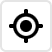
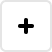
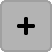
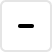
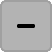
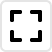
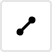
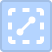
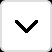
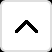
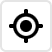

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *
from lets_plot.geo_data import *
LetsPlot.setup_html()

#### Without nudge

In [2]:
ggplot() + ylim(0, 80) + xlim(-180, 0) + \
    geom_map() + \
    geom_point(x = -73, y = 40, size = 10, color = 'red') + \
    geom_text(x = -73, y = 40, label = 'text')     

#### Different units

In [3]:
plot = ggplot() + ylim(0, 90) + xlim(-180, 0) + \
    geom_point(x = -73, y = 30, size = 5, color = 'red') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 identity', nudge_y = 50) + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 px', nudge_y = 50, nudge_unit = 'px') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 size', nudge_y = 50, nudge_unit = 'size')

gggrid([
    plot + ggtitle('Without geom_map'), 
    plot + geom_map() + ggtitle('With geom_map'),
])

#### position_nudge()

In [4]:
ggplot() + ylim(0, 90) + xlim(-180, 0) + \
    geom_point(x = -73, y = 30, size = 5, color = 'red') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 identity', position = position_nudge(0, 50)) + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 px', position = position_nudge(0, 50, 'px')) + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 size', position = position_nudge(0, 50, 'size'))

#### Data from dataframe

In [5]:
data = {
    'lon': [-73],
    'lat': [30],
    'v': [80],
}
df = pd.DataFrame(data)
ggplot(df) + ylim(0, 90) + xlim(-180, 0) + \
    geom_point(aes(x = 'lon', y = 'lat', size = 'v'), color = 'red') + \
    geom_text(aes(x = 'lon', y = 'lat'), label = 'nudge_y 50 identity', nudge_y = 50) + \
    geom_text(aes(x = 'lon', y = 'lat'), label = 'nudge_y 50 px', nudge_y = 50, nudge_unit = 'px') + \
    geom_text(aes(x = 'lon', y = 'lat'), label = 'nudge_y 50 size', nudge_y = 50, nudge_unit = 'size')

#### Text nudge is half the size of the point. The text is on the edge of the point. The projection does not affect the size.

In [6]:
plot = ggplot() + ylim(0, 90) + xlim(-180, 0) + \
    geom_point(x = -40, y = 30, size = 30, color = 'red') + \
    geom_text(x = -40, y = 30, label = 'size 15', nudge_y = 15, nudge_unit = 'size') + \
    geom_text(x = -40, y = 30, label = 'size -15', nudge_y = -15, nudge_unit = 'size') + \
    geom_point(x = -140, y = 30, size = 30, color = 'red') + \
    geom_text(x = -140, y = 30, label = 'size -15 vjust 1', nudge_y = -15, nudge_unit = 'size', vjust = 1) + \
    geom_text(x = -140, y = 30, label = 'size  15 vjust 0', nudge_y = 15, nudge_unit = 'size', vjust = 0)  + \
    geom_point(x = -40, y = 70, size = 30, color = 'red') + \
    geom_text(x = -40, y = 70, label = 'size 15', nudge_y = 15, nudge_unit = 'size') + \
    geom_text(x = -40, y = 70, label = 'size -15', nudge_y = -15, nudge_unit = 'size')  + \
    geom_point(x = -140, y = 70, size = 30, color = 'red') + \
    geom_text(x = -140, y = 70, label = 'size -15 vjust 1', nudge_y = -15, nudge_unit = 'size', vjust = 1) + \
    geom_text(x = -140, y = 70, label = 'size  15 vjust 0', nudge_y = 15, nudge_unit = 'size', vjust = 0)

gggrid([
    plot + ggtitle('Without geom_map'), 
    plot + geom_map() + ggtitle('With geom_map'), 
    
])

#### Reverse Y-axis. The nudge direction is preserved when reversing the y-axis.

In [7]:
plot = ggplot() + ylim(0, 90) + xlim(-180, 0)  + \
    geom_point(x = -90, y = 40, size = 5, color = 'red') + \
    geom_text(x = -90, y = 40, label = 'nudge_y 40 identity', nudge_y = 40) + \
    geom_text(x = -90, y = 40, label = 'nudge_y 40 px', nudge_y = 40, nudge_unit = 'px') + \
    geom_text(x = -90, y = 40, label = 'nudge_y 40 size', nudge_y = 40, nudge_unit = 'size')

gggrid([
    plot + ggtitle('default'), 
    plot + scale_y_reverse() + ggtitle('y reverse'), 
])

#### Polar coords. identity provides offset in polar coordinates. size and px provide offset in Cartesian coordinates.

In [8]:
data = {
    'x': [1,2.5,2,5,4],
    'y': [1,2,3,4,5],    
}
df = pd.DataFrame(data)

In [9]:
identity = ggplot(df) + \
    geom_point(aes(x = 'x', y = 'y'), size = 5, color = 'red') + \
    geom_text(aes(x = 'x', y = 'y', label = 'y') , nudge_y = 0.5)

In [10]:
size = ggplot(df)  + \
    geom_point(aes(x = 'x', y = 'y'), size = 5, color = 'red') + \
    geom_text(aes(x = 'x', y = 'y', label = 'y'), nudge_y = 10, nudge_unit = 'size')

In [11]:
px = ggplot(df) + \
    geom_point(aes(x = 'x', y = 'y'), size = 5, color = 'red') + \
    geom_text(aes(x = 'x', y = 'y', label = 'y'), nudge_y = 10, nudge_unit = 'px')

In [12]:
gggrid([
    identity + coord_polar() + ggtitle('identity'), 
    size + coord_polar() + ggtitle('size'), 
    px + coord_polar() + ggtitle('px')
])

In [13]:
gggrid([
    identity + coord_polar(theta = 'y') + ggtitle('identity'), 
    size + coord_polar(theta = 'y') + ggtitle('size'), 
    px + coord_polar(theta = 'y') + ggtitle('px')
])

#### Livemap. Mercator

In [14]:
scale_true = ggplot() + \
    geom_livemap(const_size_zoomin=-1) + \
    geom_point(x = -73, y = 30, size = 5, color = 'red') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 identity', nudge_y = 50) + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 px', nudge_y = 50, nudge_unit = 'px') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 size', nudge_y = 50, nudge_unit = 'size')
scale_false = ggplot() + \
    geom_livemap(const_size_zoomin=0) + \
    geom_point(x = -73, y = 30, size = 5, color = 'red') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 identity', nudge_y = 50) + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 px', nudge_y = 50, nudge_unit = 'px') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 size', nudge_y = 50, nudge_unit = 'size')


In [15]:
gggrid([
    scale_true + ggtitle('scale true'), 
    scale_false + ggtitle('scale false')    
])

#### Livemap. Conic. 

In [16]:
scale_true = ggplot() + \
    geom_livemap(const_size_zoomin=-1, projection = 'conic') + \
    geom_point(x = -73, y = 30, size = 5, color = 'red') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 identity', nudge_y = 50) + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 px', nudge_y = 50, nudge_unit = 'px') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 size', nudge_y = 50, nudge_unit = 'size')
scale_false = ggplot() + \
    geom_livemap(const_size_zoomin=0, projection = 'conic') + \
    geom_point(x = -73, y = 30, size = 5, color = 'red') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 identity', nudge_y = 50) + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 px', nudge_y = 50, nudge_unit = 'px') + \
    geom_text(x = -73, y = 30, label = 'nudge_y 50 size', nudge_y = 50, nudge_unit = 'size')

In [17]:
gggrid([
    scale_true + ggtitle('scale true'), 
    scale_false + ggtitle('scale false')    
])